In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling (mostly)
from  matplotlib.ticker import PercentFormatter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, plot_confusion_matrix, roc_auc_score, roc_curve, mean_squared_error

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Before reading

This notebook is a part of my machine learning training path. I haven't really prepared models properly to be useful in this current case since I still have such a lack of skills. Mostly, I had just mentioned that something should be done. For example: I didn't fix the imbalanced class, didn't optimize hyperparameters and didn't do a proper feature selecting. (features were selected by correlation) The main aim of this notebook is to get familiar with the basic models and checking out if they might be used in this particular case. The most efficient model that I really wanted to boost as much as possible is <b>Random Forest Classifier</b>, so if you would like to take a look... I sincerely invite you . 

### Table of Contents

    
* <b style="font-size:18px;">[Introduction](#INTRO)</b>
* <b style="font-size:18px;">[Exploratory Data Analysis](#EDA)</b>
    * [First plots](#1stplot)
    * [Is death event influenced by age?](#death_age)
    * [Is death event influenced by sex?](#death_sex)
    * [Exploring other data factors](#other_factors)
* <b style="font-size:18px;">[Data modeling](#modelling)</b>
    * [Data with OHE](#data_ohe)
    * [Data without OHE](#data_no_ohe)
    * [Train test split](#train_test)
    * [Overfitting](#overfitting)
* <b style="font-size:18px;">[Data modeling (again) - correlated features](#corr_modelling)</b>
* <b style="font-size:18px;">[Logistic Regression](#log_reg)</b>
    * [Model](#log_reg_model)
    * [Accuracy](#log_reg_acc)
    * [Confusion matrix](#log_cm)
    * [ROC AUC](#log_roc_auc)
* <b style="font-size:18px;">[Support Vector Machine (SVC)](#SVM)</b>
    * [Model](#svc_model)
    * [Accuracy](#svc_acc)
    * [Confusion matrix](#svc_cm)
    * [ROC AUC](#svc_roc_auc)
* <b style="font-size:18px;">[K-Nearest Neighbors](#kneigh)</b>
    * [Model](#kneigh_model)
    * [Accuracy](#kneigh_acc)
    * [Confusion matrix](#kneigh_cm)
    * [ROC AUC](#kneigh_roc_auc)
* <b style="font-size:18px;">[Random Forest Classifier](#rf_clf)</b>
    * [Model](#rf_model)
    * [Accuracy](#rf_acc) 
    * [GridSearchCV](#rf_grid)
    * [Confusion matrix](#rf_cm)
    * [ROC AUC](#rf_roc_auc)
* <b style="font-size:18px;">[Summary](#summary)</b>

# Introduction <a class="anchor" id="INTRO"></a>

In the following dataset we can find a lot of variables that may cause death event.


Variable to explain:
- <b>DEATH_EVENT</b> - if the patient deceased during the follow-up period (boolean)

Some of them with a bit of explanation:
- <b>Age</b> - age
- <b>Anemia</b> - decrease of red blood cells or hemoglobin (boolean)
- <b>Creatinine_phosphokinase</b> - level of the CPK enzyme in the blood (mcg/L)
- <b>Diabetes</b> - if the patient has diabetes (boolean)
- <b>Ejection_fraction</b> - percentage of blood leaving the heart at each contraction (percentage)
- <b>High_blood_pressure</b> - if the patient has hypertension (boolean)
- <b>Platelets</b> - platelets in the blood (kiloplatelets/mL)
- <b>Serum_creatinine</b> - level of serum creatinine in the blood (mg/dL)
- <b>Serum_sodium</b> - level of serum sodium in the blood (mEq/L)
- <b>Sex</b> - woman or man (binary)
- <b>Smoking</b> - if the patient smokes or not (boolean)
- <b>Time</b> - follow-up period (days)

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Exploratory Data Analysis <a class="anchor" id="EDA"></a>

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
data.shape

(299, 13)

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']] = data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].astype('category')

In [9]:
data.dtypes

age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                 category
dtype: object

In [10]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


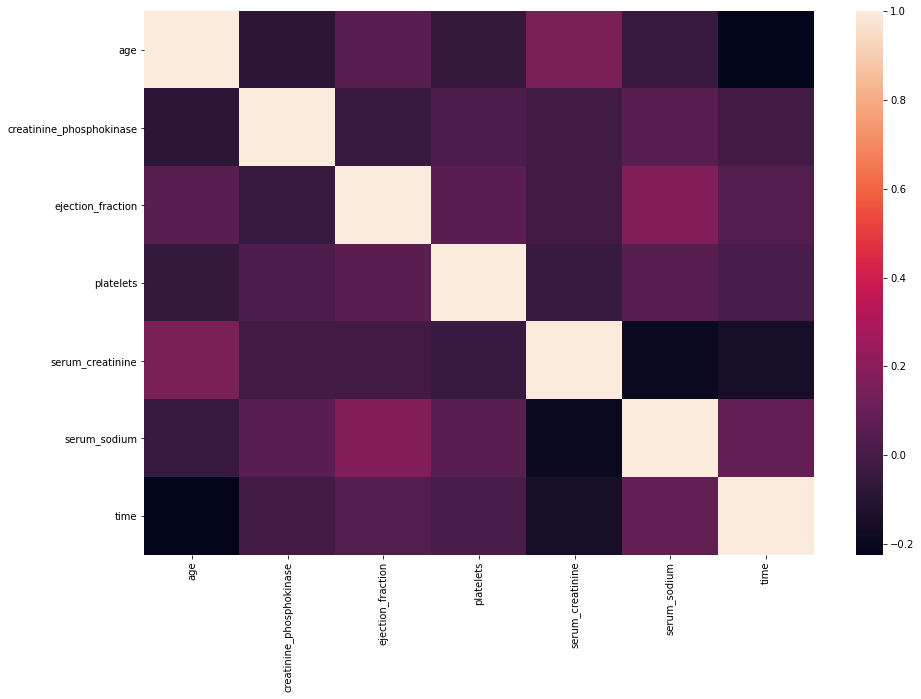

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())

The highest positive and negative correlation in the dataset.

In [12]:
data['sex'].corr(data['smoking'])

0.44589171190978966

In [13]:
data['time'].corr(data['DEATH_EVENT'])

-0.5269637792775769

# A bit of plotting to get deeper into the data <a class="anchor" id="1stplot"></a>

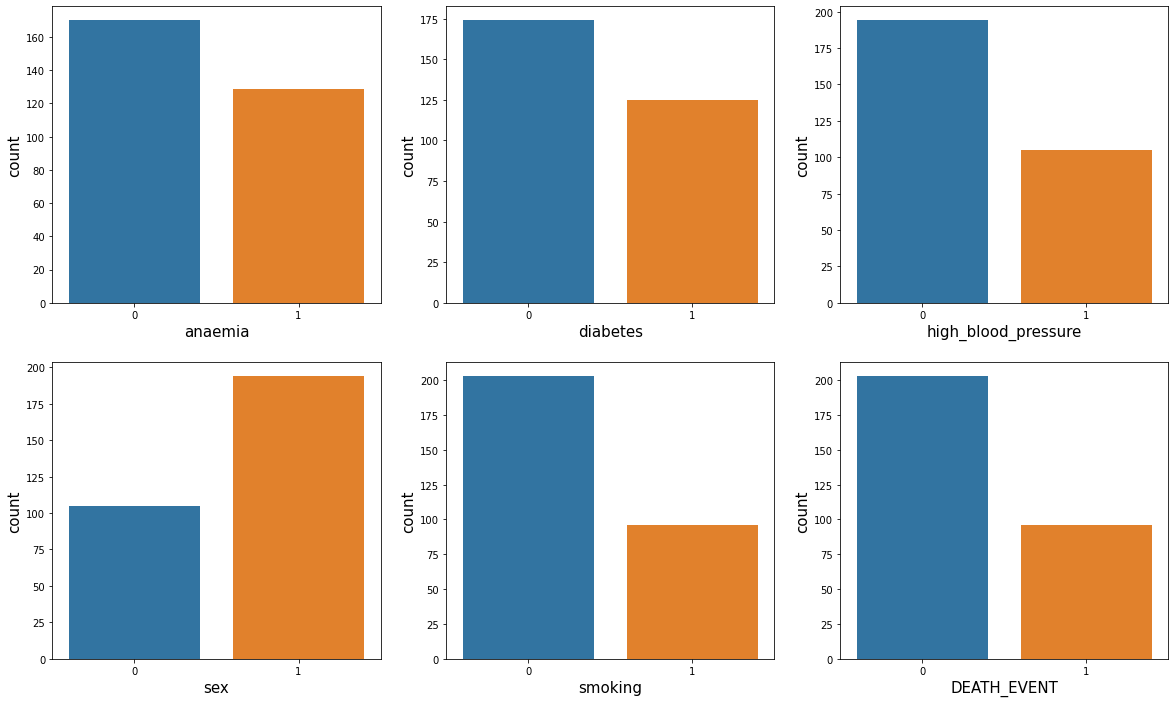

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (20,12))

dych_var = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for ax, variable in zip(axes.ravel(), dych_var):
    sns.countplot(data[variable], ax = ax)
    ax.set_xlabel(variable, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)

### Some conclusions:
- Most of the people in the dataset doesn't have anaemia, diabetes, high_blood_pressure
- More than 60% of the people do not smoke
- Mostly - people are men
- In the dataset we can find 'DEATH_EVENT' variable in proportions 2:1 (0 to 1) so it is perfectly imbalanced.

# Is death event influenced by age? <a class="anchor" id="death_age"></a>

Text(0.5, 0, 'Age')

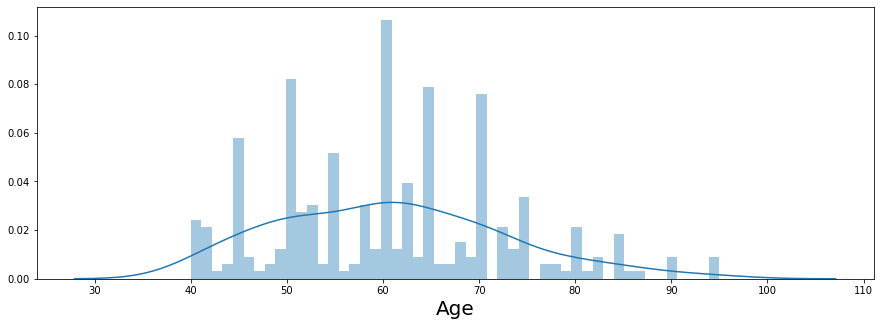

In [15]:
fig = plt.figure(figsize = (15,5))
age_label = data['age']

sns.distplot(data['age'], bins = 50)
plt.xlabel('Age', fontsize = 20)

Text(0, 0.5, 'Destiny')

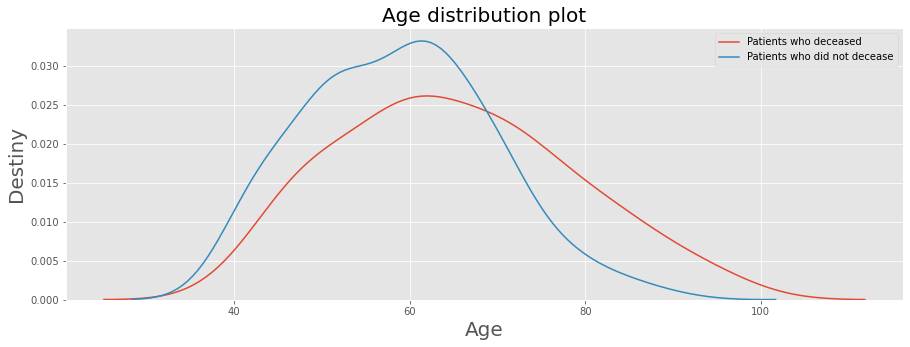

In [16]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,5))

sns.kdeplot(data.loc[data['DEATH_EVENT'] == 1, 'age'], label = 'Patients who deceased')
sns.kdeplot(data.loc[data['DEATH_EVENT'] == 0, 'age'], label = 'Patients who did not decease')

plt.title('Age distribution plot', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Destiny', fontsize = 20)

### Some conclusions:
- We can find out that patients at middle age (like 40 to 60) are more likely to survive heart failures when people after theirs 70s tend to die when some kind of heart attack appears
- What is more - in the dataset most of the people are between 40 and 80 years

# Is death event influenced by sex? <a class="anchor" id="death_sex"></a> 

Text(0, 0.5, 'Percent')

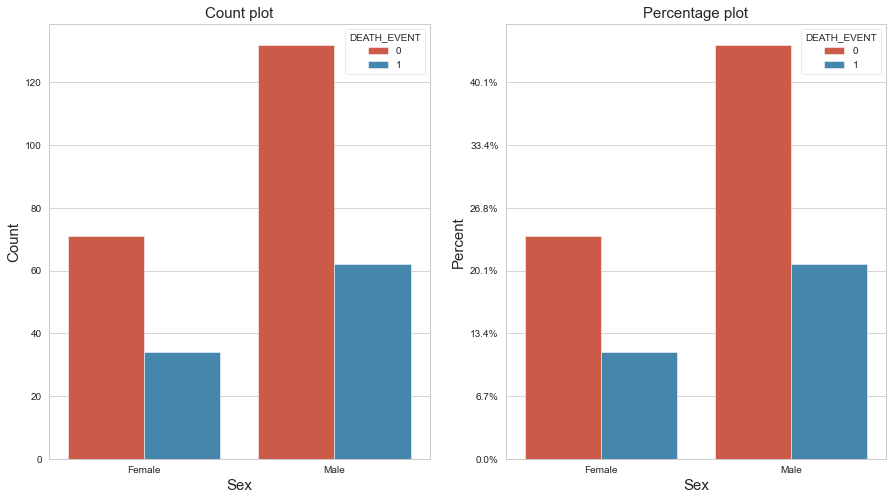

In [17]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(1, 2, figsize=(15,8))
x, hue = "sex", "DEATH_EVENT"

sns.countplot(x = x, data = data, hue = hue, ax = ax[0])
ax[0].set_title('Count plot', fontsize = 15)
ax[0].set_xticklabels(['Female', 'Male'])
ax[0].set_xlabel('Sex', fontsize = 15)
ax[0].set_ylabel('Count', fontsize = 15)

sns.countplot(x = x, hue = hue, data = data, ax = ax[1])
ax[1].yaxis.set_major_formatter(PercentFormatter(len(data)))
ax[1].set_title('Percentage plot', fontsize = 15)
ax[1].set_xticklabels(['Female', 'Male'])
ax[1].set_xlabel('Sex', fontsize = 15)
ax[1].set_ylabel('Percent', fontsize = 15)

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

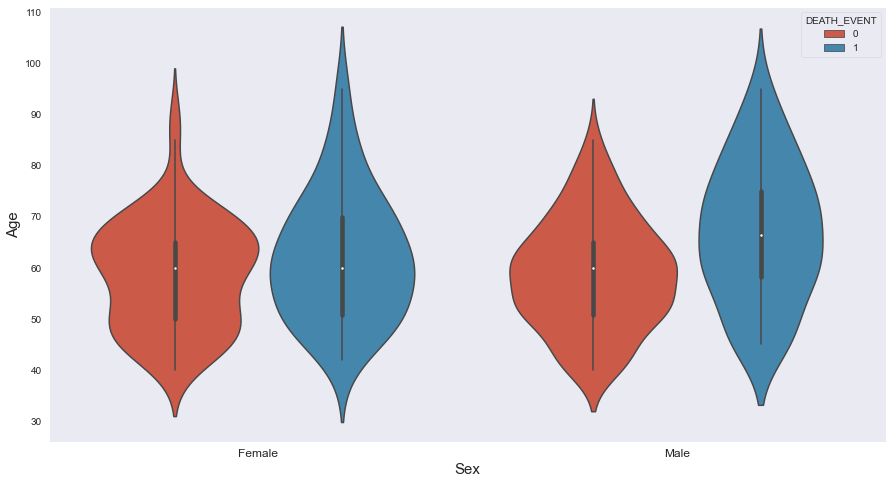

In [18]:
sns.set_style("dark")
fig = plt.subplots(figsize = (15,8))

ax = sns.violinplot(x = 'sex', y = 'age', data = data, hue = hue)
ax.set_alpha(0.2)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
ax.set_xticklabels(labels = ['Female', 'Male'], fontsize = 12)

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

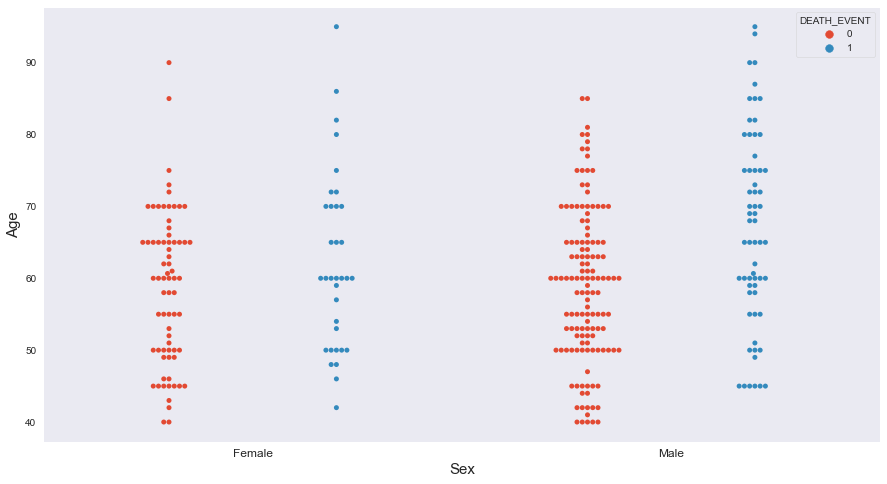

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))

sns.swarmplot(x = 'sex', y = 'age', data = data, hue = hue, dodge = True, ax = ax)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
ax.set_xticklabels(labels = ['Female', 'Male'], fontsize = 12)

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

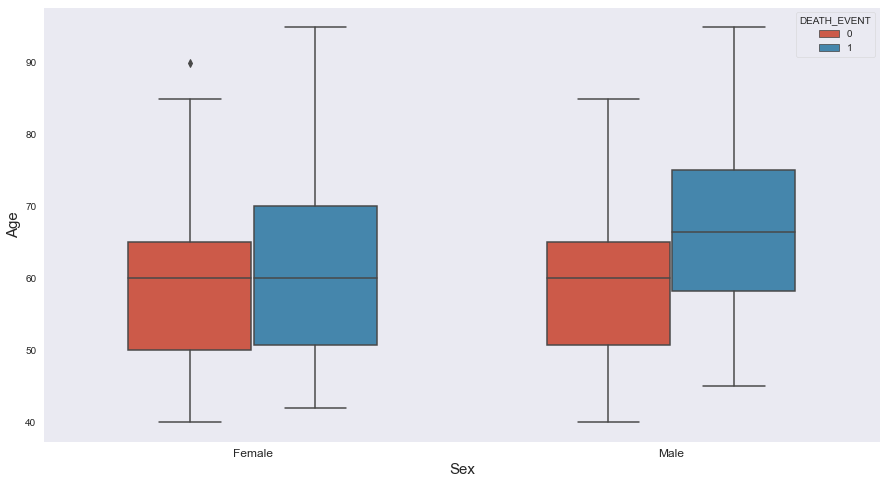

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))

sns.boxplot(x = 'sex', y = 'age', data = data, hue = hue, ax = ax, width = 0.6, whis = 1.5)
ax.set_xlabel('Sex', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.set_xticklabels(labels = ['Female', 'Male'], fontsize = 12)

### As we can see:
- Most of the people who took part in the research are men 
- It might be true that men are more endangered to have some health problems that might cause death event but we don't have enough data to analize it properly
- There is a wide range of people between 40 - 70 years
- People tend to die more often when they have more then 70 years when the disaster happens
- There is one outlier in the female data but it shouldn't really affect the prediction that much

# What about the rest? <a class="anchor" id="other_factors"></a>

In [21]:
categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'time']
Y = ['DEATH_EVENT']

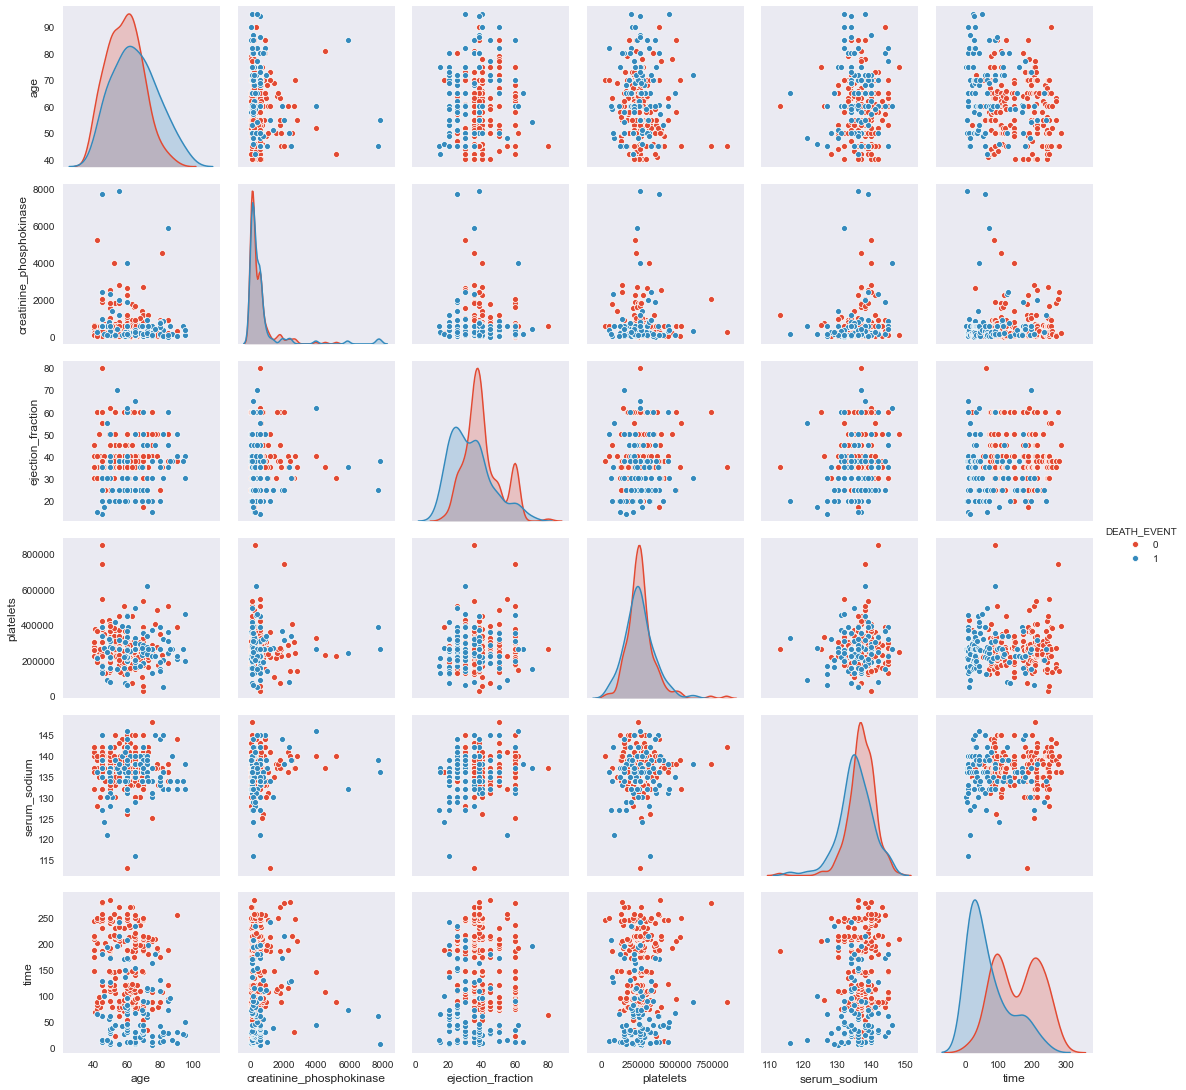

In [22]:
sns.pairplot(data = data[numerical+Y], hue = hue)

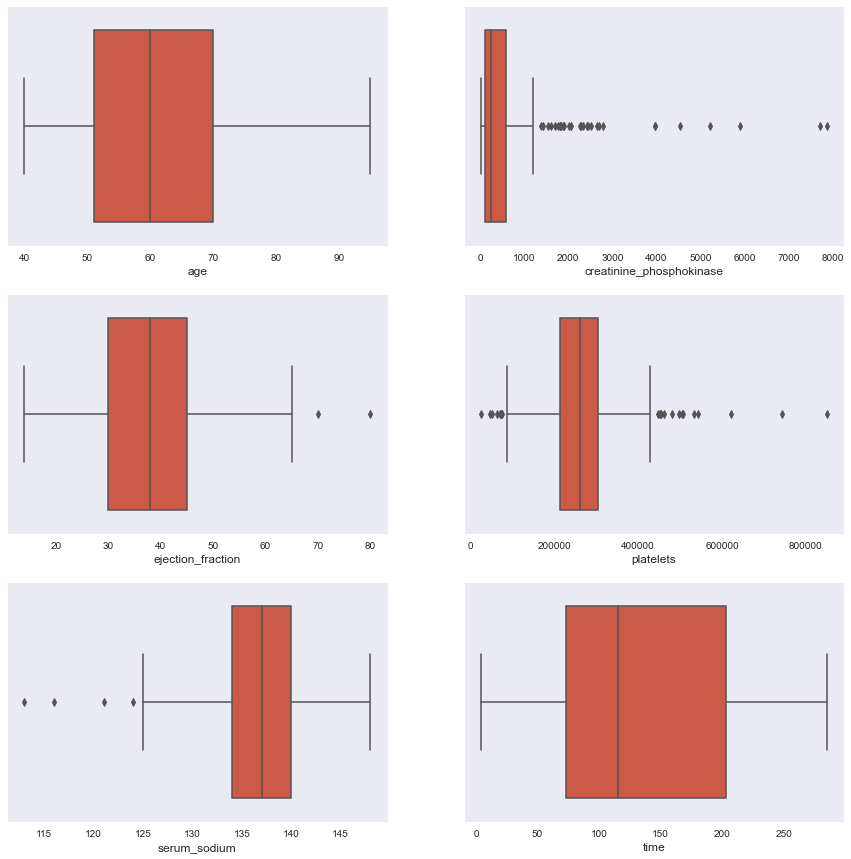

In [23]:
fig, ax = plt.subplots(3, 2, figsize = (15,15))

for ax, variable in zip(ax.ravel(), numerical):
    sns.boxplot(x = variable, data = data, ax = ax)

Actually, there is a problem since i have a lack of medical knwoledge. As we can see there are some of the anomalies detected by the boxplots but I am not sure I i should handle them. Since it is machine learning models training notebook - I am going to leave them without interference.

# <center> Data modeling <a class="anchor" id="modelling"></a>

I am going to check if there are any differences with OneHotEncoding and without it (while having only dychotomous variables). 

### Data with ONE <a class="anchor" id="data_ohe"></a>

In [24]:
# I know it is not necessary to build a Pipeline there but i just wanted to train it since I find it a very useful tool :)
num_pipeline = Pipeline([
                ('std_scaler', StandardScaler())
                ])

data_num = num_pipeline.fit_transform(data[numerical])

In [25]:
# Pipeline to transform both data - categorical and numerical

full_pipeline = ColumnTransformer([
            ("num", num_pipeline, numerical),
            ("cat", OneHotEncoder() ,categorical)
            ])

data_prepared_OHE = full_pipeline.fit_transform(data)

In [26]:
np.array(data_num)
data[categorical].values

array([[0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0]], dtype=object)

In [27]:
data_prepared_OHE.shape

(299, 18)

### Data without ONE <a class="anchor" id="data_no_ohe"></a>

In [28]:
data_prepared = np.concatenate([data_num, data[categorical].values], axis = 1)

In [29]:
data_prepared.shape

(299, 12)

### Train test split <a class="anchor" id="train_test"></a>

In [30]:
X = data_prepared
X_OHE = data_prepared_OHE
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)
X_train_OHE, X_test_OHE, y_train_OHE, y_test_OHE = train_test_split(X_OHE, y, random_state = 2, test_size = 0.2)

In [31]:
accuracy_list = []

### Checking for overfitting (based on Logistic Regression) <a class="anchor" id="overfitting"></a>

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

accuracy_list.append(100*log_acc)

In [33]:
log_reg.score(X_train, y_train)

1.0

In [34]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_acc))

Accuracy of Logistic Regression is :  100.00%


It looks like model is a bit... too perfect? Let's check if there is no overfitting.

In [35]:
scores = cross_val_score(log_reg, X_train, y_train, cv = 10)

In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [37]:
display_scores(scores)

Scores: [1.         1.         1.         1.         1.         1.
 0.95833333 1.         1.         1.        ]
Mean: 0.9958333333333333
Std: 0.01249999999999999


It looks pretty decent but we have included features that have pretty low correlation with our explained variable. Let's once again check correlations to make our model more reliable.

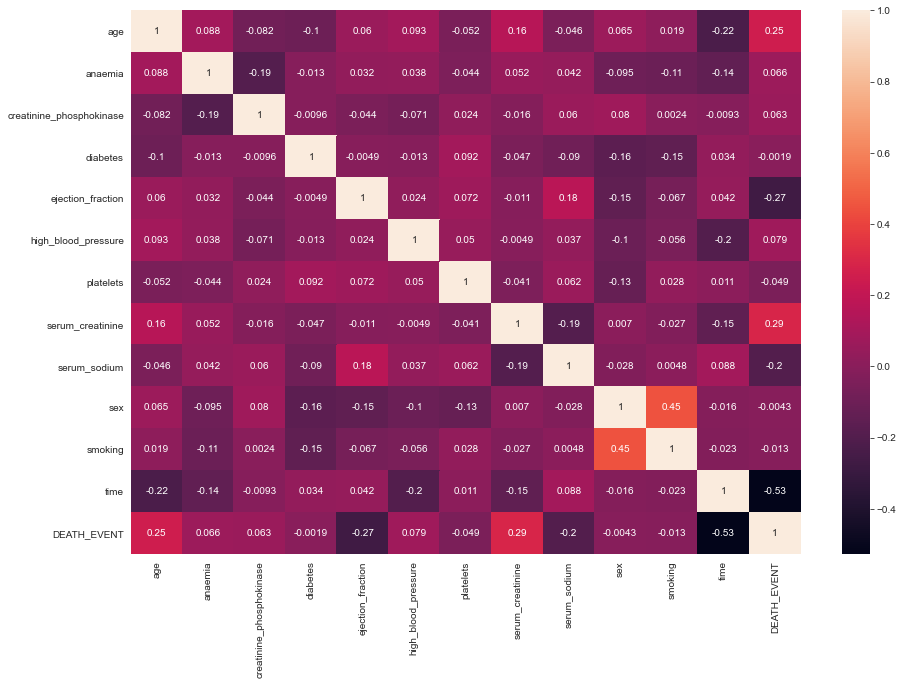

In [38]:
data_corr = pd.read_csv("heart_failure_clinical_records_dataset.csv")
plt.figure(figsize = (15,10))
sns.heatmap(data_corr.corr(), annot = True)

As we can see, most of the data is not really correlated with our explained variable. (DEATH EVENT) Let's fix it pretty quick and then re-fit our logistic regression model. In the model I am going to include variables with the highest positive and negative correlations - age, serum_creatinine, time, ejection_fraction.

# Data modeling once again after fixing correlated features <a class="anchor" id="corr_modelling"></a>

As we can see - no category variables are included into model so we can just normalize numerical variables.

In [39]:
Features = ['age', 'ejection_fraction','serum_creatinine', 'time']
scaler = StandardScaler()
num_data = scaler.fit_transform(data[Features])

In [40]:
X = num_data
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

accuracy_list = []

# Logistic Regression <a class="anchor" id="log_reg"></a>

### Model <a class="anchor" id="log_reg_model"></a>

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

accuracy_list.append(100*log_acc)

### Accuracy <a class="anchor" id="log_reg_acc"></a>

In [42]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_acc))

Accuracy of Logistic Regression is :  88.33%


In [43]:
log_reg.score(X_train, y_train)

0.8158995815899581

In [44]:
scores = cross_val_score(log_reg, X_train, y_train, cv = 10)

In [45]:
display_scores(scores)

Scores: [0.875      0.79166667 0.875      0.83333333 0.79166667 0.79166667
 0.83333333 0.75       0.83333333 0.7826087 ]
Mean: 0.8157608695652174
Std: 0.038871678686503146


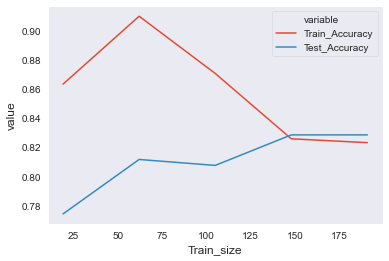

In [46]:
train_size, train_acc, test_acc = learning_curve(log_reg, X_train, y_train)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),
                         "Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars = 'Train_size')
sns.lineplot(x = 'Train_size', y = 'value', data = learn_df, hue = 'variable')

There is one interesting thing to observe in this data - when we train our data - the accuracy hits 81,5%. However, the logistic regression hits accuracy nearly at 88% when we are checking the testing data. 

### Confusion matrix <a class="anchor" id="log_cm"></a>

[Text(0, 0, 'Heart not failed'), Text(0, 0, 'Heart Failed')]

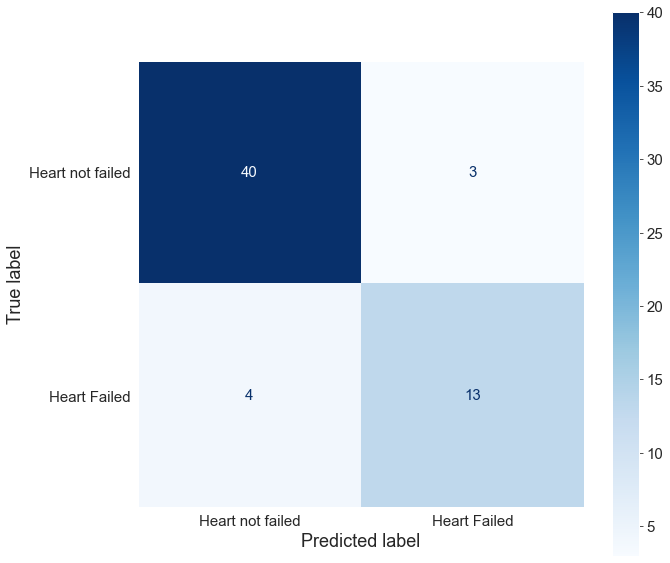

In [47]:
plt.rc('font', size=15)  

fig, ax = plt.subplots(1,1,figsize = (10,10))
plot_confusion_matrix(log_reg, X_test, y_test, ax = ax, cmap=plt.cm.Blues)
ax.set_xticklabels(['Heart not failed', 'Heart Failed'])
ax.set_yticklabels(['Heart not failed', 'Heart Failed'])

### ROC AUC <a class="anchor" id="log_roc_auc"></a>

In [48]:
def plotting_ROC(fpr, tpr, score, label):
    plt.plot(fpr, tpr, label = label % score)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.legend(loc = 'lower right')

Text(0.5, 1.0, 'ROC - Logistic Regression [train]')

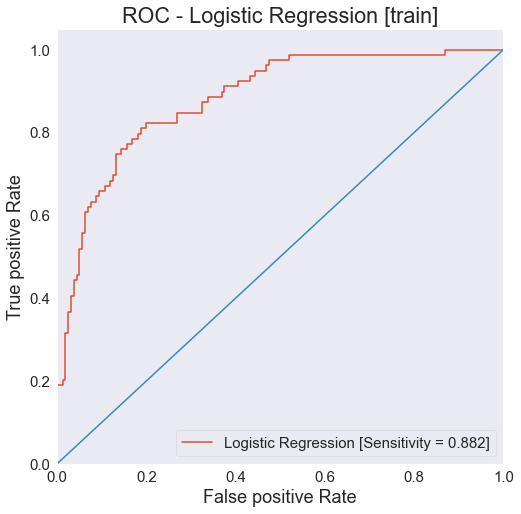

In [49]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(X_train)[:,1])
logit_auc_score = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:,1])
plotting_ROC(fpr, tpr, logit_auc_score, "Logistic Regression [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - Logistic Regression [train]")

Text(0.5, 1.0, 'ROC - Logistic Regression [test]')

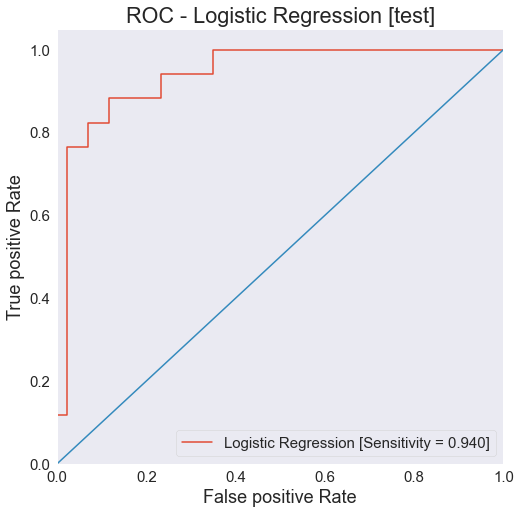

In [50]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
logit_auc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
plotting_ROC(fpr, tpr, logit_auc_score, "Logistic Regression [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - Logistic Regression [test]")

Well, as we can see Logistic Regression is doing ok at the training data (roc auc score around 0,882). However, it works really good on testing data. It might be a signal that there is something wrong with our model. It might be due to the class imbalance. 

# Support Vector Machine <a class="anchor" id="SVM"></a>

### Model<a class="anchor" id="svc_model"></a>

In [51]:
svc_clf = SVC(probability = True)
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)

accuracy_list.append(100*svc_acc)

### Accuracy  <a class="anchor" id="svc_acc"></a>

In [52]:
print("Accuracy of Support Vector Machine (classifier) is : ", "{:.2f}%".format(100* svc_acc))

Accuracy of Support Vector Machine (classifier) is :  88.33%


In [53]:
svc_clf.score(X_train, y_train)

0.8451882845188284

In [54]:
scores = cross_val_score(svc_clf, X_train, y_train, cv = 30)

In [55]:
display_scores(scores)

Scores: [0.625 0.875 1.    0.625 0.75  1.    0.75  1.    0.75  1.    0.75  0.875
 0.875 0.75  0.875 0.875 0.875 0.875 0.875 0.75  1.    0.875 0.375 0.875
 0.625 0.75  0.875 0.625 0.75  1.   ]
Mean: 0.8166666666666667
Std: 0.14337208778404378


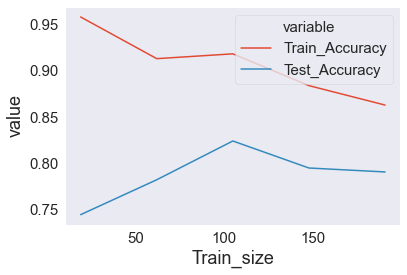

In [56]:
train_size, train_acc, test_acc = learning_curve(svc_clf, X_train, y_train)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),
                         "Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars = 'Train_size')
sns.lineplot(x = 'Train_size', y = 'value', data = learn_df, hue = 'variable')

Well, looking at the plot we can say that overfitting is having a place in the Support Vector Machines model. However, maybe a larger dataset would have fix it properly. If we had a bigger dataset, the gap would probably disappear. What is more, we have such a imbalance in the main class which is being explained. 

### Confusion matrix <a class="anchor" id="svc_cm"></a>

[Text(0, 0, 'Heart not failed'), Text(0, 0, 'Heart Failed')]

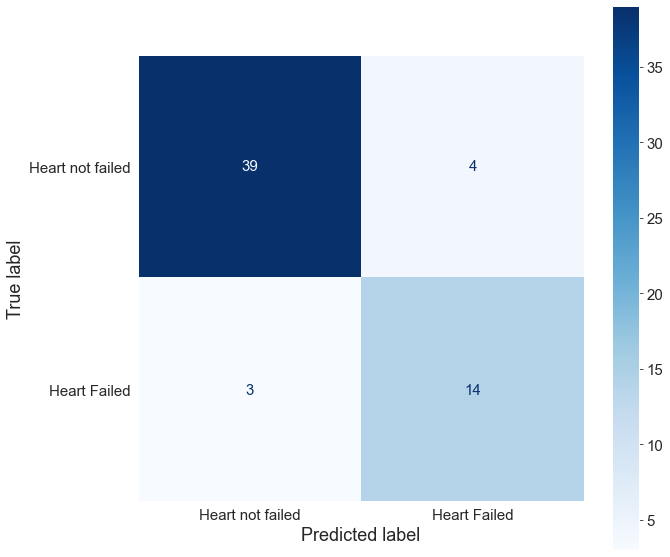

In [57]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
plot_confusion_matrix(svc_clf, X_test, y_test, ax = ax, cmap=plt.cm.Blues)
ax.set_xticklabels(['Heart not failed', 'Heart Failed'])
ax.set_yticklabels(['Heart not failed', 'Heart Failed'])

### ROC AUC <a class="anchor" id="svc_roc_auc"></a>

Text(0.5, 1.0, 'ROC - SVC [train]')

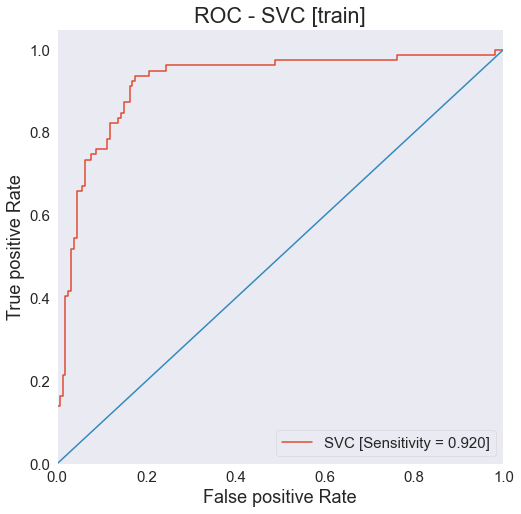

In [58]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_train, svc_clf.predict_proba(X_train)[:,1])
svc_auc_score = roc_auc_score(y_train, svc_clf.predict_proba(X_train)[:,1])
plotting_ROC(fpr, tpr, svc_auc_score, "SVC [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - SVC [train]")

Text(0.5, 1.0, 'ROC - SVC [test]')

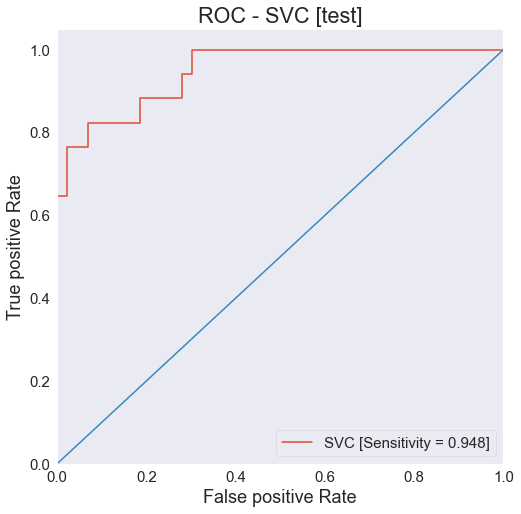

In [59]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_test, svc_clf.predict_proba(X_test)[:,1])
svc_auc_score = roc_auc_score(y_test, svc_clf.predict_proba(X_test)[:,1])
plotting_ROC(fpr, tpr, svc_auc_score, "SVC [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - SVC [test]")

Both ROC AUC look good, nothing to add at all.

# K Neighbors <a class="anchor" id="kneigh"></a>

### Model <a class="anchor" id="kneigh_model"></a>

In [60]:
kneigh_clf = KNeighborsClassifier(n_neighbors = 5)
kneigh_clf.fit(X_train, y_train)
kneigh_pred = kneigh_clf.predict(X_test)
kneigh_acc = accuracy_score(y_test, kneigh_pred)

accuracy_list.append(100*kneigh_acc)

### Accuracy  <a class="anchor" id="kneigh_acc"></a>

In [61]:
print("Accuracy of KNN (classifier) is : ", "{:.2f}%".format(100* kneigh_acc))

Accuracy of KNN (classifier) is :  91.67%


In [62]:
kneigh_clf.score(X_train, y_train)

0.8619246861924686

In [63]:
scores = cross_val_score(kneigh_clf, X_train, y_train, cv = 30)

In [64]:
display_scores(scores)

Scores: [1.    0.875 1.    0.5   0.625 1.    0.75  1.    0.75  0.875 0.75  0.875
 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 0.875 1.    0.375 0.875
 0.5   0.625 1.    0.625 0.625 1.   ]
Mean: 0.8166666666666667
Std: 0.16687486995417322


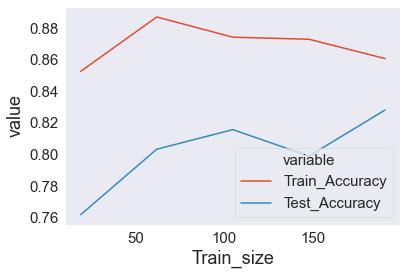

In [65]:
train_size, train_acc, test_acc = learning_curve(kneigh_clf, X_train, y_train)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),
                         "Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars = 'Train_size')
sns.lineplot(x = 'Train_size', y = 'value', data = learn_df, hue = 'variable')

### Confusion matrix <a class="anchor" id="kneigh_cm"></a>

[Text(0, 0, 'Heart not failed'), Text(0, 0, 'Heart Failed')]

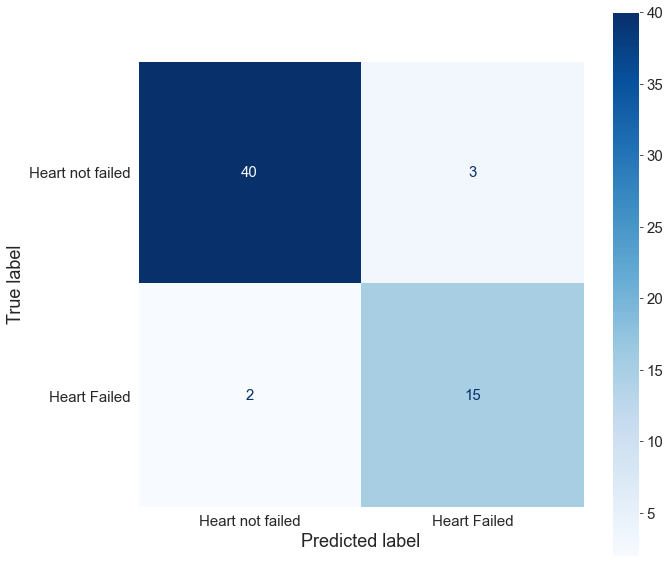

In [66]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
plot_confusion_matrix(kneigh_clf, X_test, y_test, ax = ax, cmap=plt.cm.Blues)
ax.set_xticklabels(['Heart not failed', 'Heart Failed'])
ax.set_yticklabels(['Heart not failed', 'Heart Failed'])

### ROC AUC <a class="anchor" id="kneigh_roc_auc"></a>

Text(0.5, 1.0, 'ROC - KNN [train]')

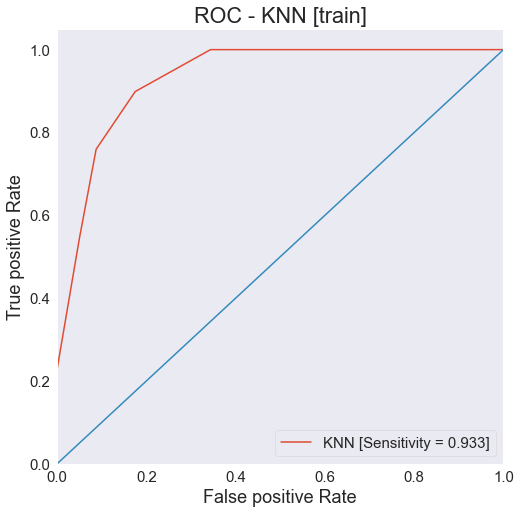

In [67]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_train, kneigh_clf.predict_proba(X_train)[:,1])
knn_auc_score = roc_auc_score(y_train, kneigh_clf.predict_proba(X_train)[:,1])
plotting_ROC(fpr, tpr, knn_auc_score, "KNN [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - KNN [train]")

Text(0.5, 1.0, 'ROC - KNN [test]')

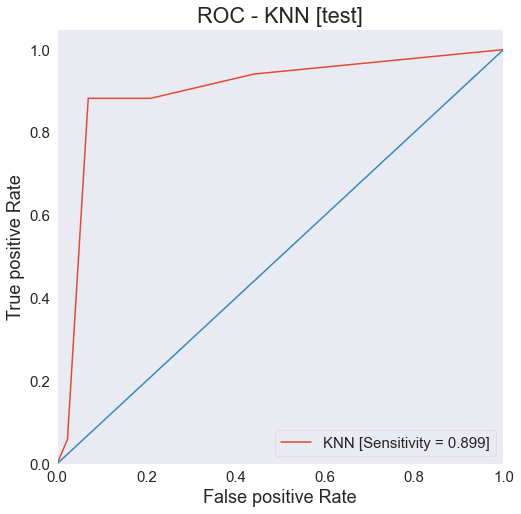

In [68]:
plt.figure(figsize = (8,8))

fpr, tpr, thresholds = roc_curve(y_test, kneigh_clf.predict_proba(X_test)[:,1])
knn_auc_score = roc_auc_score(y_test, kneigh_clf.predict_proba(X_test)[:,1])
plotting_ROC(fpr, tpr, knn_auc_score, "KNN [Sensitivity = %0.3f]")

plt.plot([0,1], [0,1])
plt.title("ROC - KNN [test]")

There is a difference between training and testing dataset when it comes to ROC AUC. However, the gap is pretty small so it shouldn't be considered bad only due to this fact. 

# Random Forest Classifier <a class="anchor" id="rf_clf"></a>

### Model  <a class="anchor" id="rf_model"></a>

Firstly I am going to check forest without choosing hyperparameters. 

In [69]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

### Accuracy  <a class="anchor" id="rf_acc"></a>

In [70]:
print("Accuracy of Random Forest (classifier) is : ", "{:.2f}%".format(100*rf_acc))

Accuracy of Random Forest (classifier) is :  86.67%


In [71]:
rf_clf.score(X_train, y_train)

1.0

In [72]:
scores = cross_val_score(rf_clf, X_train, y_train, cv = 30)

In [73]:
display_scores(scores)

Scores: [0.875      0.75       1.         0.75       0.5        1.
 0.75       1.         0.75       1.         0.75       0.875
 0.75       1.         0.875      0.875      0.75       0.75
 0.75       1.         0.875      0.875      0.375      0.75
 0.625      0.875      0.875      0.625      0.625      0.85714286]
Mean: 0.8035714285714286
Std: 0.15004251098285715


### RMSE scores

In [74]:
forest_train_pred = rf_clf.predict(X_train)

In [75]:
forest_rmse = mean_squared_error(y_train, forest_train_pred)
forest_rmse = np.sqrt(forest_rmse)
forest_rmse

0.0

In [76]:
scores2 = cross_val_score(rf_clf, X_train, y_train, cv=30, scoring = 'neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-scores2)

In [77]:
display_scores(forest_rmse_scores)

Scores: [0.35355339 0.35355339 0.         0.5        0.70710678 0.
 0.5        0.         0.35355339 0.         0.5        0.35355339
 0.5        0.         0.35355339 0.35355339 0.5        0.5
 0.5        0.         0.         0.35355339 0.79056942 0.5
 0.61237244 0.5        0.35355339 0.61237244 0.5        0.37796447]
Mean: 0.3642937555125216
Std: 0.22631533558986794


Well, we can see that our model is literally overfit! The difference between accuracy of training data, validate data from cross validation and accuracy of testing set is too high. I am going to restrict it a bit. To prove it - let's plot the accuracy of train and test sets. What is more, our RMSE for training model equals 0 whereas cross validation has given us a score near 0,4 - it proves overfitting.

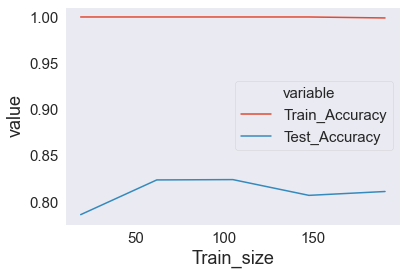

In [78]:
train_size, train_acc, test_acc = learning_curve(rf_clf, X_train, y_train)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),
                         "Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars = 'Train_size')
sns.lineplot(x = 'Train_size', y = 'value', data = learn_df, hue = 'variable')

As we thought - Random forests are too complicated to deal up with such a small dataset. Let's try to fix it a bit to avoid overfitting. 

### GridSearchCV <a class="anchor" id="rf_grid"></a>

In [79]:
param_grid = [{'n_estimators':[3, 10, 30, 100, 300], 'max_depth':[2,3,4,5,6]}]

grid_search = GridSearchCV(rf_clf, param_grid, cv = 10, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 30, 100, 300]}],
             return_train_score=True)

In [80]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=10)

In [81]:
cvres = grid_search.cv_results_

for score_train, score_test, params in zip(cvres['mean_train_score'], cvres['mean_test_score'], cvres['params']):
    print('Train:', score_train,', Test:', score_test, params)

Train: 0.834493970714901 , Test: 0.8115942028985508 {'max_depth': 2, 'n_estimators': 3}
Train: 0.8484388458225667 , Test: 0.8322463768115943 {'max_depth': 2, 'n_estimators': 10}
Train: 0.8572631352282514 , Test: 0.8239130434782609 {'max_depth': 2, 'n_estimators': 30}
Train: 0.8586649440137812 , Test: 0.8322463768115942 {'max_depth': 2, 'n_estimators': 100}
Train: 0.858667097329888 , Test: 0.8280797101449275 {'max_depth': 2, 'n_estimators': 300}
Train: 0.8665654608096467 , Test: 0.8115942028985508 {'max_depth': 3, 'n_estimators': 3}
Train: 0.8744702842377261 , Test: 0.8239130434782608 {'max_depth': 3, 'n_estimators': 10}
Train: 0.8846985357450474 , Test: 0.8197463768115943 {'max_depth': 3, 'n_estimators': 30}
Train: 0.8847049956933679 , Test: 0.8239130434782609 {'max_depth': 3, 'n_estimators': 100}
Train: 0.8842355727820845 , Test: 0.8239130434782609 {'max_depth': 3, 'n_estimators': 300}
Train: 0.8735400516795865 , Test: 0.8030797101449275 {'max_depth': 4, 'n_estimators': 3}
Train: 0.89

In [82]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 10}

Well, let's check if this model is a bit better than our previous one.

In [83]:
grid_search.best_estimator_.feature_importances_

array([0.11022882, 0.1028026 , 0.23906848, 0.54790009])

We could consider dropping first feature since its importance is pretty low - it might improve our model. I am not going to do this in the current model but still it is a good idea. :)

In [84]:
best_rf_clf = RandomForestClassifier(max_depth = 4)
best_rf_clf.fit(X_train, y_train)
best_rf_pred = best_rf_clf.predict(X_test)
best_rf_acc = accuracy_score(best_rf_pred, y_test)
accuracy_list.append(100*best_rf_acc)

In [85]:
print("Accuracy of Random Forest (classifier) is : ", "{:.2f}%".format(100*best_rf_acc))

Accuracy of Random Forest (classifier) is :  95.00%


In [86]:
best_rf_clf.score(X_train, y_train)

0.9037656903765691

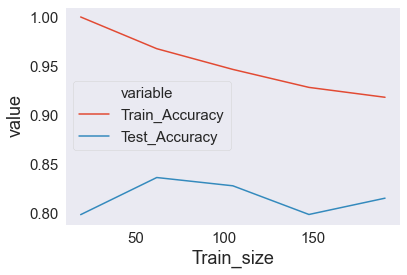

In [87]:
train_size, train_acc, test_acc = learning_curve(best_rf_clf, X_train, y_train)
learn_df = pd.DataFrame({"Train_size":train_size,"Train_Accuracy":train_acc.mean(axis=1),
                         "Test_Accuracy":test_acc.mean(axis=1)}).melt(id_vars = 'Train_size')
sns.lineplot(x = 'Train_size', y = 'value', data = learn_df, hue = 'variable')

# Summary <a class="anchor" id="summary"></a>

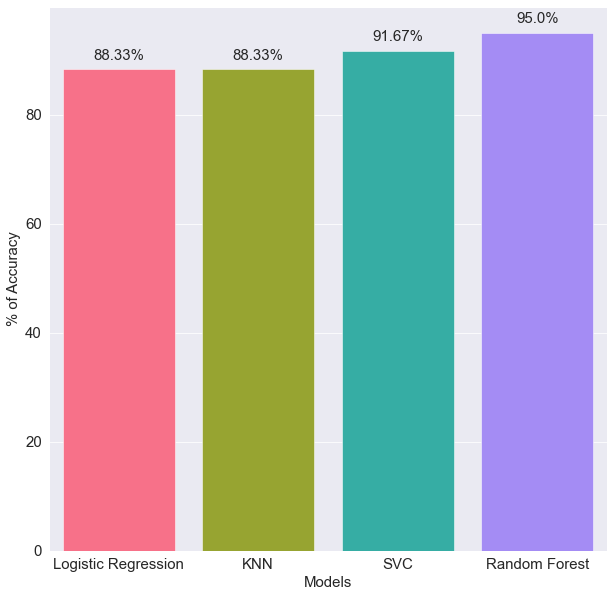

In [95]:
fig, ax = plt.subplots(1,1,figsize = (10,10))

models = ['Logistic Regression', 'KNN', 'SVC', 'Random Forest']
sns.set_style('darkgrid')

ax = sns.barplot(x=models, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('% of Accuracy', fontsize = 15)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')

As we can see from the chart above - the best model is Random Forest. It had the lowest difference between training and testing dataset so overfitting didn't matter that much. Sadly, in every model overfit had taken place - it might have been caused by class imbalance or tiny dataset. (only 300 rows)